In [ ]:
# Load the Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz


**Task 1** <br>
- loading the data <br>

  Selecting all features except "class" as X,
  selecting "class" as y, and splitting into
  three parts: 60% train, 20% validation and 20% test.<br>
  Remember to use stratification, and "random_state=YOUR_ID".<br>

  Using the train data, build twenty trees, by varying the
  max_depth from 5 up to 100, in steps of 5. <br>
  Remember to use "random_state=YOUR_ID" for the tree.<br>

  [1 mark]


In [ ]:
# Load the data set from the provided URL
url = "https://raw.githubusercontent.com/bpfa/data_for_compx310_2023/main/covtypeNorm_f1_5_s42.csv"
data = pd.read_csv(url)

# Select all features except "class" as X
X = data.drop("class", axis=1)

# Select "class" as y
y = data["class"]

# Prepare to split into three parts: 60% train, 20% validation and 20% test
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Use "random_state=YOUR_ID"
MY_ID = 1481257
random_state = MY_ID

# Use stratification, as that will help ensure that the class distribution is maintained in the subsets during the data split.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1 - train_ratio), stratify=y, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_ratio / (test_ratio + val_ratio)), stratify=y_temp, random_state=random_state)

# The max_depth is to be from 5 up to 100, in steps of 5
max_depth_values = range(5, 101, 5)

# Prepare to collect the accuracies - to be used in a future task (task 2)
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Prepare to store trees in an appropriately named list - to be used in a future task (task 3)
forest = []

# Using the train data, build twenty trees
for max_depth in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    tree.fit(X_train, y_train)

    # Collect the train accuracies, the validation accuracies, and the test
    # accuracies for all 20 trees - to be used in a future task (task 2)
    train_acc = tree.score(X_train, y_train)
    val_acc = tree.score(X_val, y_val)
    test_acc = tree.score(X_test, y_test)



    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

    # Add the trees to this list - to be used in a future task (task 3)
    forest.append(tree)

    # Prepare to plot the smallest tree - to be used in a future task (task 2)
    if max_depth == 5:
        smallest_tree = tree



**Task 2**<br>
- plot the smallest tree

  Collect the train accuracies, the validation accuracies,
  and the test accuracies for all 20 trees and generate
  a single plot: show tree-depth on the x-axis, and all three
  types of the accuracies on the y-axis.<br>

  Does the tree depth with the maximum validation accuracy
  coincide with the depth for the maximum test accuracy?<br>
  
  [1 mark]

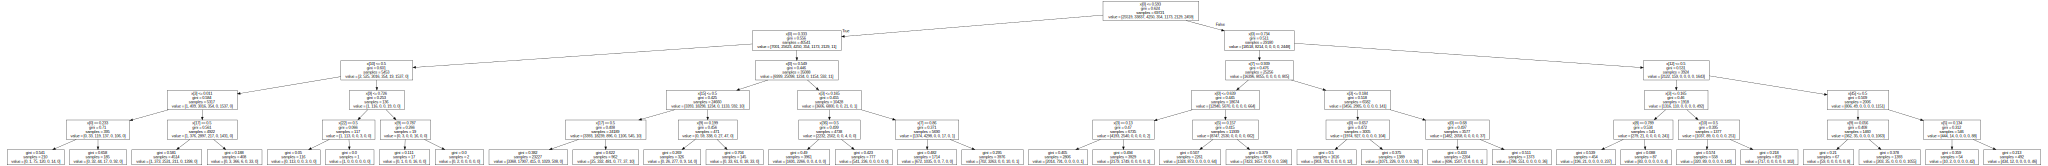

In [ ]:
# Plot the smallest tree
dot_data = export_graphviz(smallest_tree, out_file=None)
graph = graphviz.Source(dot_data, format="png")
graph



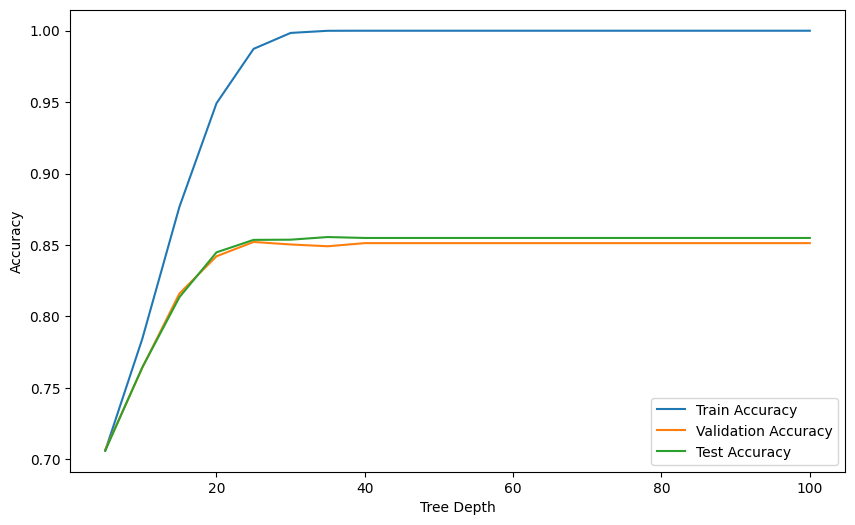

In [ ]:








# Generate a single plot for all of the previously collected accuracies of all 20 trees
plt.figure(figsize=(10, 6))

# Show tree-depth on the x-axis, and all three types of the accuracies on the y-axis.
plt.plot(max_depth_values, train_accuracies, label="Train Accuracy")
plt.plot(max_depth_values, val_accuracies, label="Validation Accuracy")
plt.plot(max_depth_values, test_accuracies, label="Test Accuracy")

# Indicate on the plot that tree-depth is shown on the x-axis, and accuracy is on the y-axis
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


**Does the tree depth with the maximum validation accuracy coincide with the depth for the maximum test accuracy?**

> Answer: <br>

> No, the maximum validation accuracy and the maximum test accuracy do not occur at the same tree depth. The tree depth of the maximum test accuracy seems to be within the range of 30 to 40, and at this range there is a noticable decline in the validation accuracy - the validation accuracy is observably not at it's maximum here.



**Task 3**<br>
- the tree object has an attribute "tree_" giving you
  access to the internal data structure. Among other options, this data structure has two attributes "max_depth" and "node_count".<br>
  Generate two more plots, one with the actual max depth of each tree,
  and one for the node count of each tree. <br>

  Do you think you can improve the test accuracy by
  growing even larger trees, with a max-depth > 100?<br>

  [1 mark]

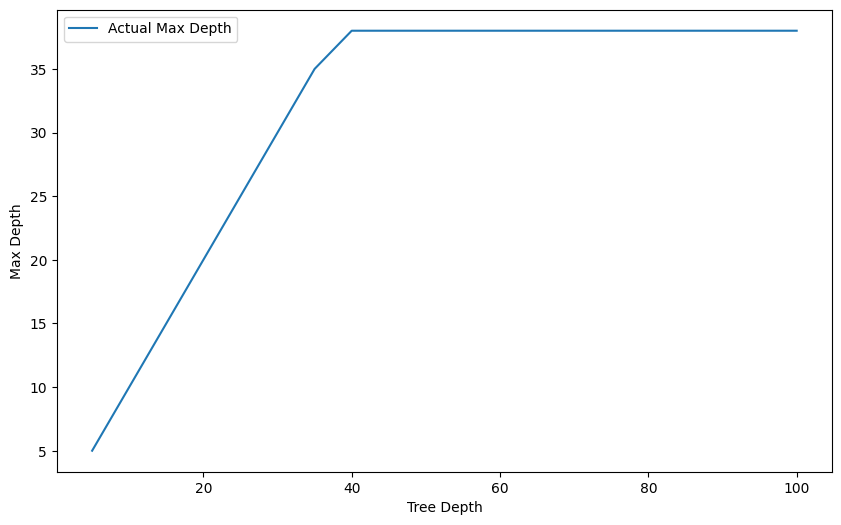

In [ ]:
# Prepare to plot the actual max depth each tree
actual_max_depths = [tree.tree_.max_depth for tree in forest]

# Generate the max_depth plot
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, actual_max_depths, label="Actual Max Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Max Depth")
plt.legend()
plt.show()






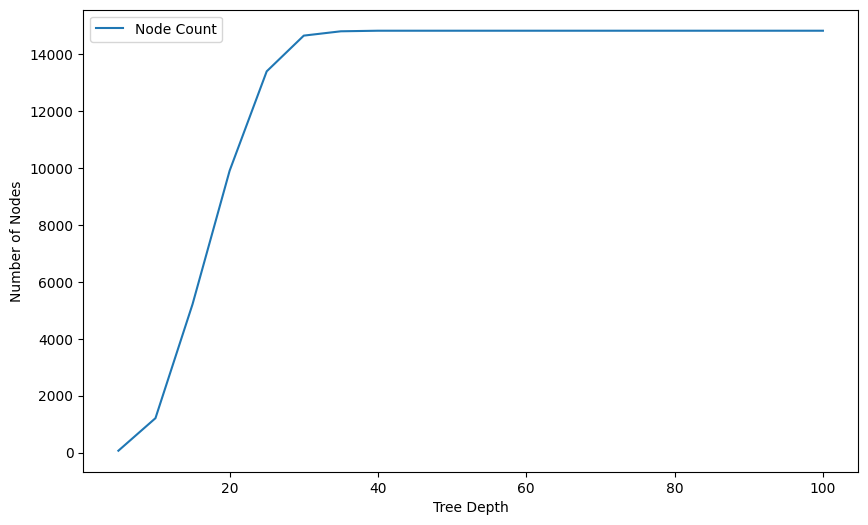

In [ ]:

# Prepare to plot the node count of each tree
node_counts = [tree.tree_.node_count for tree in forest]

# Generate the node_count plot
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, node_counts, label="Node Count")
plt.xlabel("Tree Depth")
plt.ylabel("Number of Nodes")
plt.legend()
plt.show()











**Can you improve the test accuracy by growing even larger trees, with a max-depth > 100?**

> Answer: <br>

> No, I don't think that this would improve test accuracy.<br>
Growing larger decision trees, with a max_depth greater than 100, may cause overfitting. This is where the trees will become too specific to the training data and fail to capture the underlying patterns that are common to new data.
To maximize test accuracy, it is essential to find the optimal max_depth which strikes a balance between complexity and generalisation.
